Salt and pepper noise image


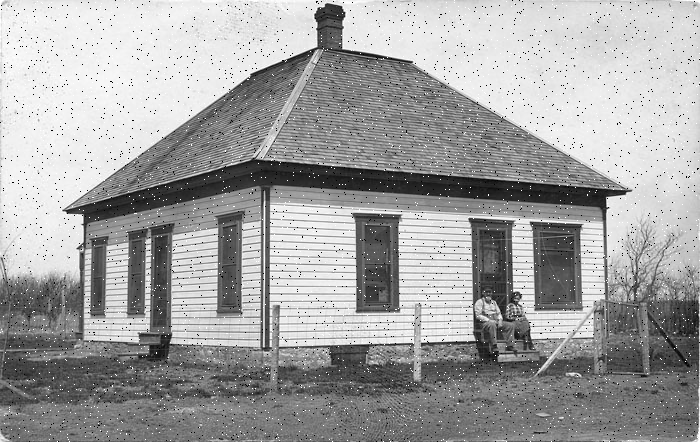

denoised image


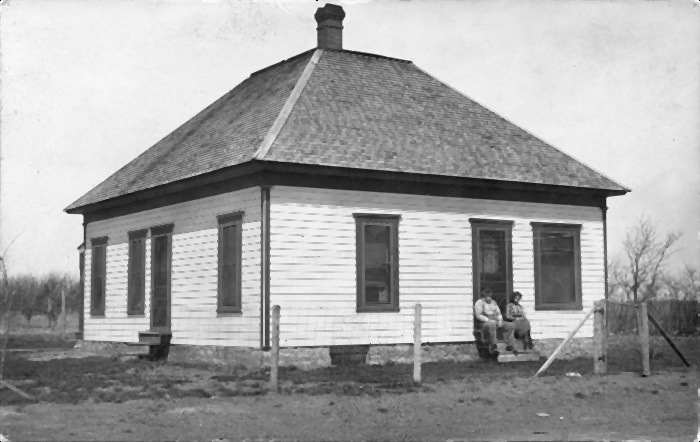

Edges X


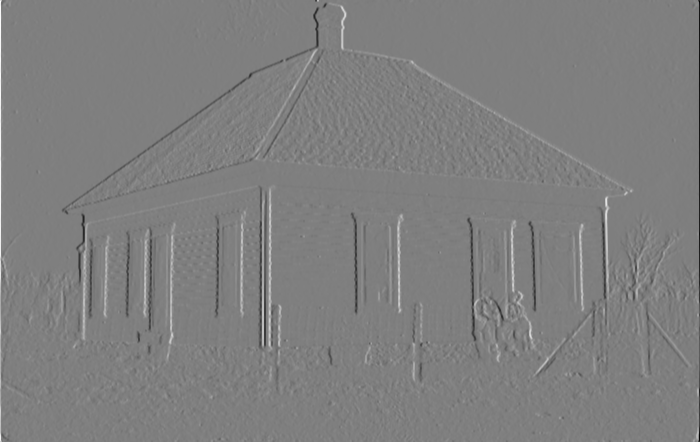

Edges Y


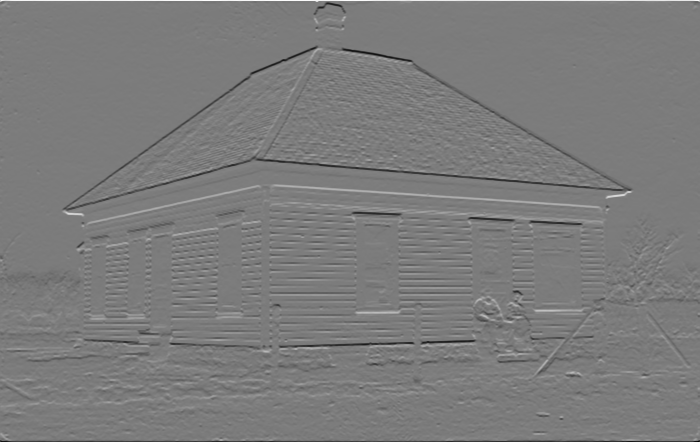

Magnitude of X and Y combined


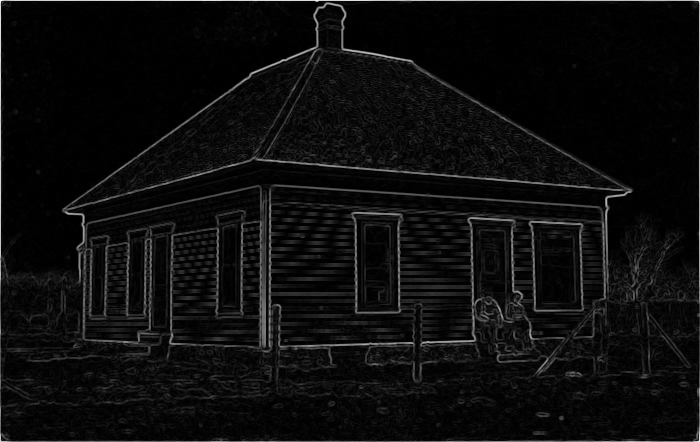

Edges across 45 degrees


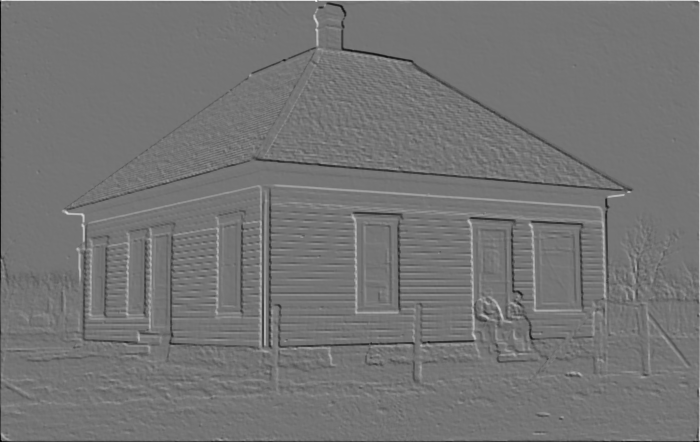

Edges across 135 degrees


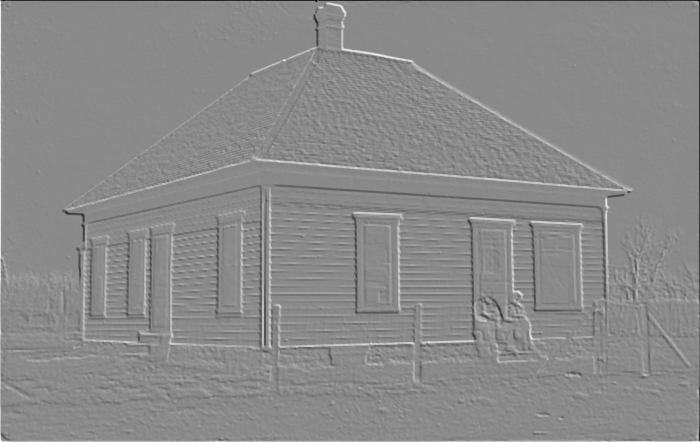

[[ 0  1  2]
 [-1  0  1]
 [-2 -1  0]] [[ 0 -1 -2]
 [ 1  0 -1]
 [ 2  1  0]]


In [2]:
"""
 Grayscale Image Processing
(Due date: Nov. 26, 11:59 P.M., 2021)

The goal of this task is to experiment with two commonly used 
image processing techniques: image denoising and edge detection. 
Specifically, you are given a grayscale image with salt-and-pepper noise,.

(i) denoise the image using 3x3 median filter;
(ii) detect edges in the denoised image along both x and y directions using Sobel operators (provided in line 30-32).
(iii) design two 3x3 kernels and detect edges in the denoised image along both 45° and 135° diagonal directions.

"""

from cv2 import imread, imwrite, imshow, IMREAD_GRAYSCALE, namedWindow, waitKey, destroyAllWindows
import numpy as np
from google.colab.patches import cv2_imshow
# Sobel operators are given here, do NOT modify them.
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]).astype(int)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).astype(int)
diognal_x = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]]).astype(int)
diognal_y = np.array([[0, -1, -2], [1, 0, -1], [2, 1, 0]]).astype(int)

def filter(img):
    """
    :param img: numpy.ndarray(int), image
    :return denoise_img: numpy.ndarray(int), image, same size as the input image

    Apply 3x3 Median Filter and reduce salt-and-pepper noises in the input noise image
    """
    # print(img)
    img_padded = np.pad(img, (1,1), 'constant')
    denoise_img=np.zeros(img.shape)
    # print(img_padded)
    # print(img_padded[1,1])
    for i in range(1,len(img_padded)-1):
      for j in range(1,len(img_padded[0])-1):
        # print(img_padded[i,j)
        # print(i,j)
        # print(img_padded[i-1:i+2,j-1:j+2])
        denoise_img[i-1,j-1]=np.median(img_padded[i-1:i+2,j-1:j+2])
        # print(denoise_img[i,j])
    # print(img_padded[0:5])
    # TO DO: implement your solution here
    # raise NotImplementedError
    print("Salt and pepper noise image")
    cv2_imshow(img)
    print("denoised image")
    cv2_imshow(denoise_img)
    # print(denoise_img)
    return denoise_img


def convolve2d(img, kernel):
    """
    :param img: numpy.ndarray, image
    :param kernel: numpy.ndarray, kernel
    :return conv_img: numpy.ndarray, image, same size as the input image

    Convolves a given image (or matrix) and a given kernel.
    """
    img_padded = np.pad(img, (1,1), 'constant')
    conv_img=np.zeros(img.shape)
    flipped_kernel=np.flip(kernel)
    for i in range(1,len(img_padded)-1):
      for j in range(1,len(img_padded[0])-1):
        # print(i,j)
        
        conv_img[i-1,j-1]=np.sum(img_padded[i-1:i+2,j-1:j+2]*flipped_kernel)
    return conv_img


def edge_detect(img):
    """
    :param img: numpy.ndarray(int), image
    :return edge_x: numpy.ndarray(int), image, same size as the input image, edges along x direction
    :return edge_y: numpy.ndarray(int), image, same size as the input image, edges along y direction
    :return edge_mag: numpy.ndarray(int), image, same size as the input image, 
                      magnitude of edges by combining edges along two orthogonal directions.

    Detect edges using Sobel kernel along x and y directions.
    Please use the Sobel operators provided in line 30-32.
    Calculate magnitude of edges by combining edges along two orthogonal directions.
    All returned images should be normalized to [0, 255].
    """
    edge_x=convolve2d(img,sobel_x)
    edge_y=convolve2d(img,sobel_y)
    edge_mag=np.sqrt(np.square(edge_x) + np.square(edge_y))
   
    edge_x=(255*((edge_x-np.min(edge_x))/(np.max(edge_x)-np.min(edge_x)))).astype(int)
    edge_y=(255*((edge_y-np.min(edge_y))/(np.max(edge_y)-np.min(edge_y)))).astype(int)
    edge_mag=(255*((edge_mag-np.min(edge_mag))/(np.max(edge_mag)-np.min(edge_mag)))).astype(int)
    print("Edges X")
    cv2_imshow(edge_x)
    print("Edges Y")
    cv2_imshow(edge_y)
    print("Magnitude of X and Y combined")
    cv2_imshow(edge_mag) 
    return edge_x, edge_y, edge_mag


def edge_diag(img):
    """
    :param img: numpy.ndarray(int), image
    :return edge_45: numpy.ndarray(int), image, same size as the input image, edges along x direction
    :return edge_135: numpy.ndarray(int), image, same size as the input image, edges along y direction

    Design two 3x3 kernels to detect the diagonal edges of input image. Please print out the kernels you designed.
    Detect diagonal edges along 45° and 135° diagonal directions using the kernels you designed.
    All returned images should be normalized to [0, 255].
    """
    edge_45=convolve2d(img,diognal_x)
    # cv2_imshow(edge_45)   
    edge_135=convolve2d(img,diognal_y)
    edge_45=(((edge_45-np.min(edge_45))/(np.max(edge_45)-np.min(edge_45)))*255).astype(int)
    edge_135=(((edge_135-np.min(edge_135))/(np.max(edge_135)-np.min(edge_135)))*255).astype(int)
    print("Edges across 45 degrees")
    cv2_imshow(edge_45)  
    print("Edges across 135 degrees")  
    cv2_imshow(edge_135)    
    # TO DO: implement your solution here
    # raise NotImplementedError
    print(diognal_x,diognal_y) # print the two kernels you designed here
    return edge_45, edge_135


if __name__ == "__main__":
    noise_img = imread('task2.png', IMREAD_GRAYSCALE)
    denoise_img = filter(noise_img)
    imwrite('results/task2_denoise.jpg', denoise_img)
    edge_x_img, edge_y_img, edge_mag_img = edge_detect(denoise_img)
    imwrite('results/task2_edge_x.jpg', edge_x_img)
    imwrite('results/task2_edge_y.jpg', edge_y_img)
    imwrite('results/task2_edge_mag.jpg', edge_mag_img)
    edge_45_img, edge_135_img = edge_diag(denoise_img)
    imwrite('results/task2_edge_diag1.jpg', edge_45_img)
    imwrite('results/task2_edge_diag2.jpg', edge_135_img)







In [ ]:
a=imread('task2.png', IMREAD_GRAYSCALE)
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]).astype(int)
a=np.array([[100, 20,30], [10, 9,50],[44,60,31]])
print(a)
print(np.dot(a,a))
print(a*sobel_x)
# a=np.pad(a, (1,1), 'constant')
# print(a)
# print(a[1:4,1:4])
# np.median(a[1:4,1:4])

[[100  20  30]
 [ 10   9  50]
 [ 44  60  31]]
[[11520  3980  4930]
 [ 3290  3281  2300]
 [ 6364  3280  5281]]
[[ 100    0  -30]
 [  20    0 -100]
 [  44    0  -31]]
